<a href="https://colab.research.google.com/github/tejpal123456789/Fabguard/blob/main/Task_1_image_to_sheet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Extract text from Image and then update that details on the Excel Sheet

In [1]:
!pip install easyocr

import matplotlib.pyplot as plt
import cv2
import easyocr

reader = easyocr.Reader(['en', 'hi'])

file_name = "/content/drive/MyDrive/Fabgaurd Internship/python to excel practice/a1e3125efaa4eebd8efc907ae48b69a1.jpg"

image=plt.imread(file_name)



     |████████████████████████████████| 63.6 MB 8.7 kB/s 


### Image Augumentation

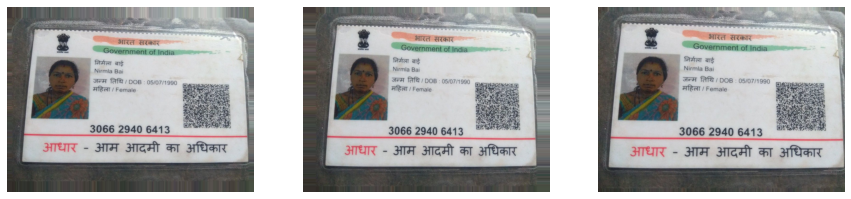

In [2]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(zoom_range=0.2)

img = load_img(file_name)  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
aug_iter = datagen.flow(x, batch_size=1)

# generate samples and plot
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):

	# convert to unsigned integers
	image = next(aug_iter)[0].astype('uint8')
 
	# plot image
	ax[i].imshow(image)
	ax[i].axis('off')

In [3]:
aug_iter

In [4]:
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/Fabgaurd Internship/python to excel practice', save_prefix='aadhar_card', save_format='jpeg'):
    i += 1
    if i > 0:
        break  # otherwise the generator would loop indefinitely

        

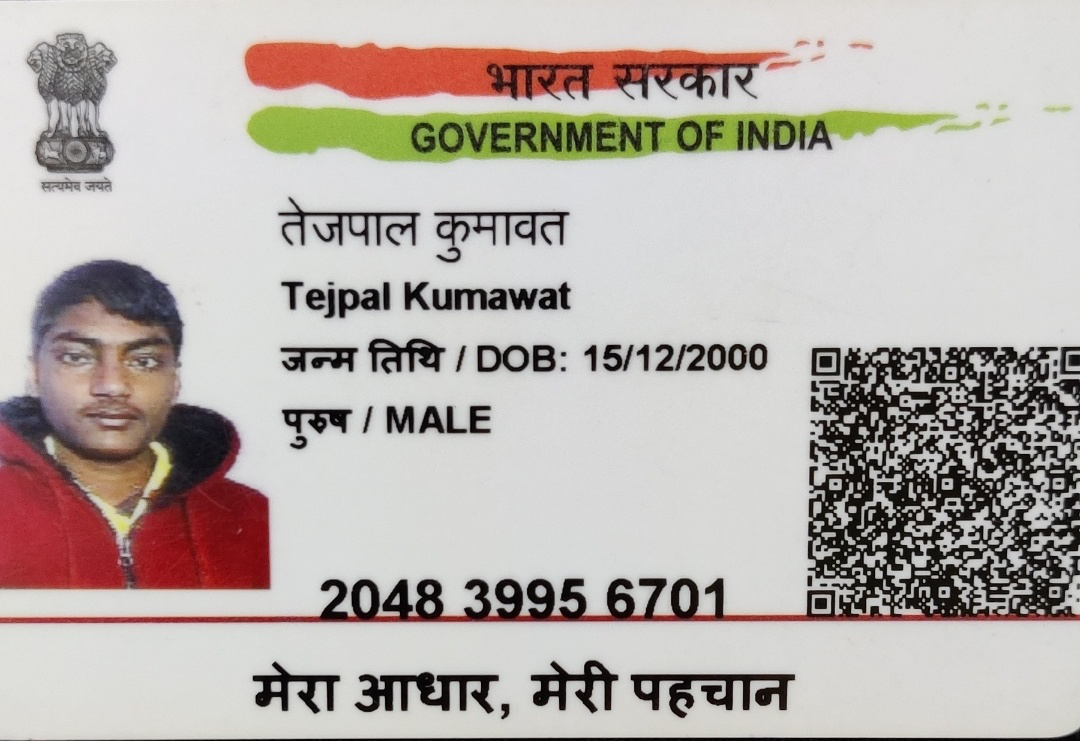

In [5]:
import PIL
image=PIL.Image.open('/content/drive/MyDrive/Fabgaurd Internship/python to excel practice/temp.jpg')
image

In [6]:
file_name='/content/drive/MyDrive/Fabgaurd Internship/python to excel practice/temp.jpg'

output = reader.readtext(file_name)

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


In [7]:
output

[([[479, 55], [768, 55], [768, 108], [479, 108]],
  'भारत सरकार',
  0.6185860016263816),
 ([[405, 113], [837, 113], [837, 157], [405, 157]],
  'GOVERNMENT OF INDIA',
  0.9315759634398254),
 ([[268, 193], [578, 193], [578, 270], [268, 270]],
  'तेजपाल कुमावत',
  0.6690058514819119),
 ([[272, 271], [578, 271], [578, 327], [272, 327]],
  'Tejpal Kumawat',
  0.9691551694909162),
 ([[277, 333], [451, 333], [451, 377], [277, 377]],
  'जन्म तिथि',
  0.6199104322085758),
 ([[471, 337], [775, 337], [775, 379], [471, 379]],
  'D0B: 15/12/2000',
  0.5935763595849985),
 ([[277, 401], [359, 401], [359, 452], [277, 452]],
  'पुरुष',
  0.7851137088032196),
 ([[381, 399], [497, 399], [497, 439], [381, 439]],
  'MALE',
  0.5656360036234452),
 ([[316, 569], [735, 569], [735, 626], [316, 626]],
  '2048_3995_6701',
  0.577147985706069),
 ([[248, 654], [804, 654], [804, 728], [248, 728]],
  'मेरा आधार , मेरी पहचान',
  0.7934574043362604)]

In [8]:
output[9]

([[248, 654], [804, 654], [804, 728], [248, 728]],
 'मेरा आधार , मेरी पहचान',
 0.7934574043362604)

In [9]:
def text_name(input):
    names=[]
    for i in range(10):
     list1=list(output[i])
     names.append(list1[1])

    return names

In [10]:
output_text=text_name(output)
output_text

['भारत सरकार',
 'GOVERNMENT OF INDIA',
 'तेजपाल कुमावत',
 'Tejpal Kumawat',
 'जन्म तिथि',
 'D0B: 15/12/2000',
 'पुरुष',
 'MALE',
 '2048_3995_6701',
 'मेरा आधार , मेरी पहचान']

## Bounding box on the relevant text

In [11]:
from PIL import ImageDraw
import PIL

def draw_boxes(image, bounds,color='blue',width=2):
    draw=ImageDraw.Draw(image)
    x=[3,5,7,8]
    for i in x:
        p0,p1,p2,p3=bounds[i][0]
        draw.line([*p0,*p1,*p2,*p3,*p0],fill=color,width=width)
    return image    

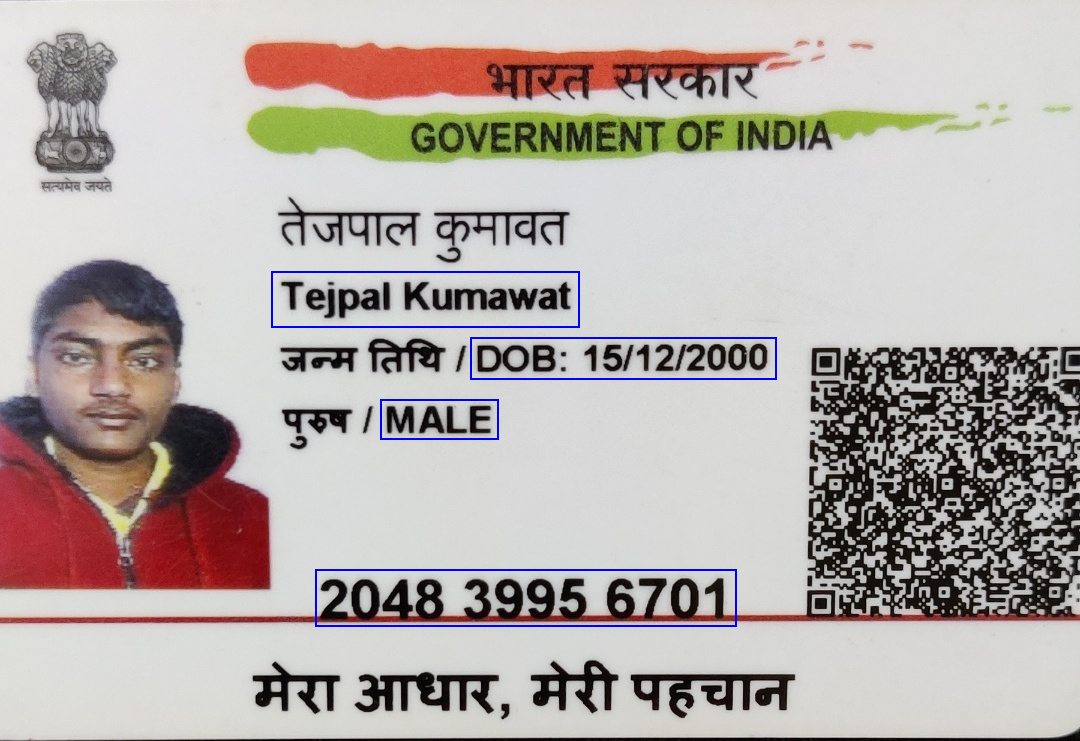

In [12]:

draw_boxes(image,output)


### Text from the pan card

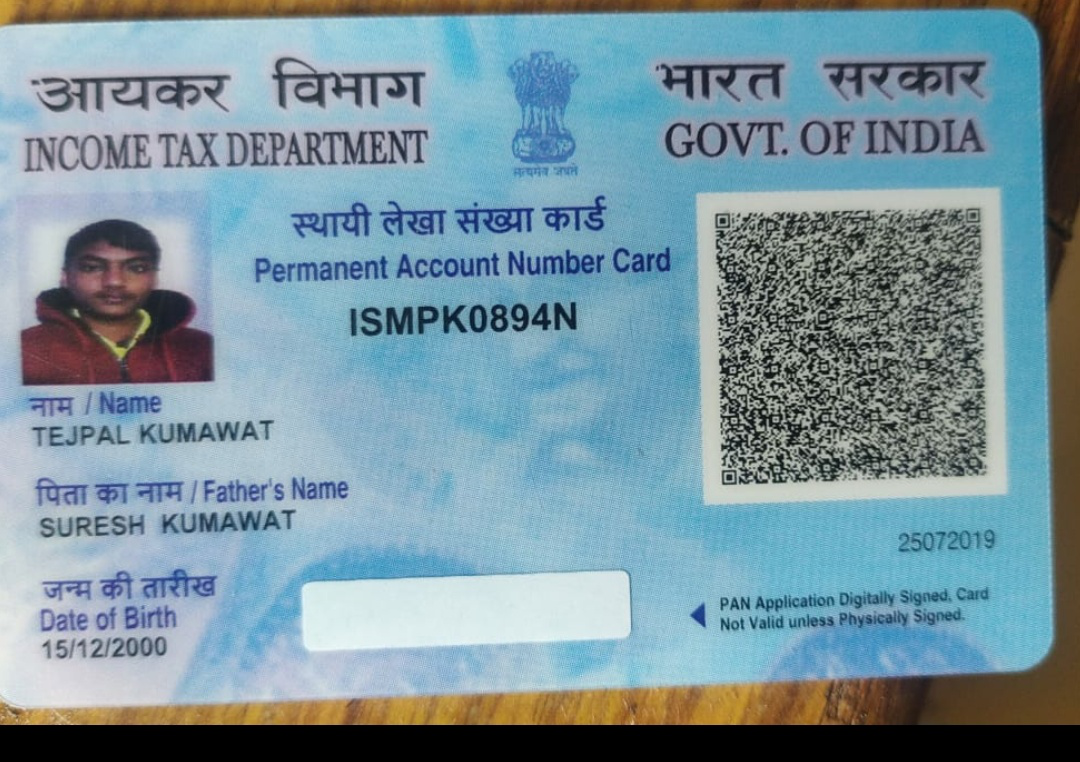

In [13]:
image1=PIL.Image.open('/content/drive/MyDrive/Fabgaurd Internship/python to excel practice/Screenshot_20210706-151730__01.jpg')
image1

# Image Augumentation for the Pan Card

In [14]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

datagen = ImageDataGenerator(zoom_range=0.2)

img = load_img('/content/drive/MyDrive/Fabgaurd Internship/python to excel practice/Screenshot_20210706-151730__01.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='/content/drive/MyDrive/Fabgaurd Internship/python to excel practice', save_prefix='pan_card', save_format='jpeg'):
    i += 1
    if i > 0:
        break  # otherwise the generator would loop indefinitely

        

In [15]:
output2=reader.readtext('/content/drive/MyDrive/Fabgaurd Internship/python to excel practice/Screenshot_20210706-151730__01.jpg')
output2

[([[26, 68], [240, 68], [240, 118], [26, 118]], 'आयकर', 0.669013832033729),
 ([[264, 53], [436, 53], [436, 117], [264, 117]], 'विभाग', 0.4205226176278396),
 ([[649, 55], [792, 55], [792, 107], [649, 107]], 'भारत', 0.8585874416122745),
 ([[818, 52], [998, 52], [998, 106], [818, 106]], 'सरकार', 0.987754226220166),
 ([[14, 120], [437, 120], [437, 180], [14, 180]],
  'INCOME TAX DEPARTMENT',
  0.9855753563482093),
 ([[658, 112], [988, 112], [988, 164], [658, 164]],
  'GOVT OF INDIA',
  0.4593316092373082),
 ([[282, 190], [614, 190], [614, 247], [282, 247]],
  'स्थायी लेखा संख्या कार्ड',
  0.5622082974077478),
 ([[247, 242], [678, 242], [678, 290], [247, 290]],
  'Permanent Account Number Card',
  0.8425424153976605),
 ([[339, 292], [584, 292], [584, 344], [339, 344]],
  'ISMPKO89AN',
  0.2862575848397005),
 ([[28, 394], [76, 394], [76, 418], [28, 418]], 'नाम', 0.8850380182266235),
 ([[96, 388], [168, 388], [168, 420], [96, 420]], 'Name', 0.9965064525604248),
 ([[27, 414], [279, 414], [279,

In [16]:
output2[11]

([[27, 414], [279, 414], [279, 453], [27, 453]],
 'TEJPAL KUMAWAT',
 0.6090775471239627)

### Taking care of the case of the letters 

In [17]:
output[3]

([[272, 271], [578, 271], [578, 327], [272, 327]],
 'Tejpal Kumawat',
 0.9691551694909162)

In [23]:
output2[11][1]

'TEJPAL KUMAWAT'

In [18]:

def lower_the_case(input):
    
    y=input.split(' ')
    y1=y[0].lower()
    y2=y[1].lower()
    y11=y1[0].upper()+y1[1:]
    y22=y2[0].upper()+y2[1:]
    y0=[y11,y22]
  
    return ' '.join(y0)


In [24]:
pancard_name=lower_the_case(output2[11][1])
pancard_name


'Tejpal Kumawat'

### Bounding box on the relevant text

In [25]:
from PIL import ImageDraw
import PIL

def draw_boxes(image, bounds,color='blue',width=2):
    draw=ImageDraw.Draw(image)
    x=[8,11,21]
    for i in x:
        p0,p1,p2,p3=bounds[i][0]
        draw.line([*p0,*p1,*p2,*p3,*p0],fill=color,width=width)
    return image   

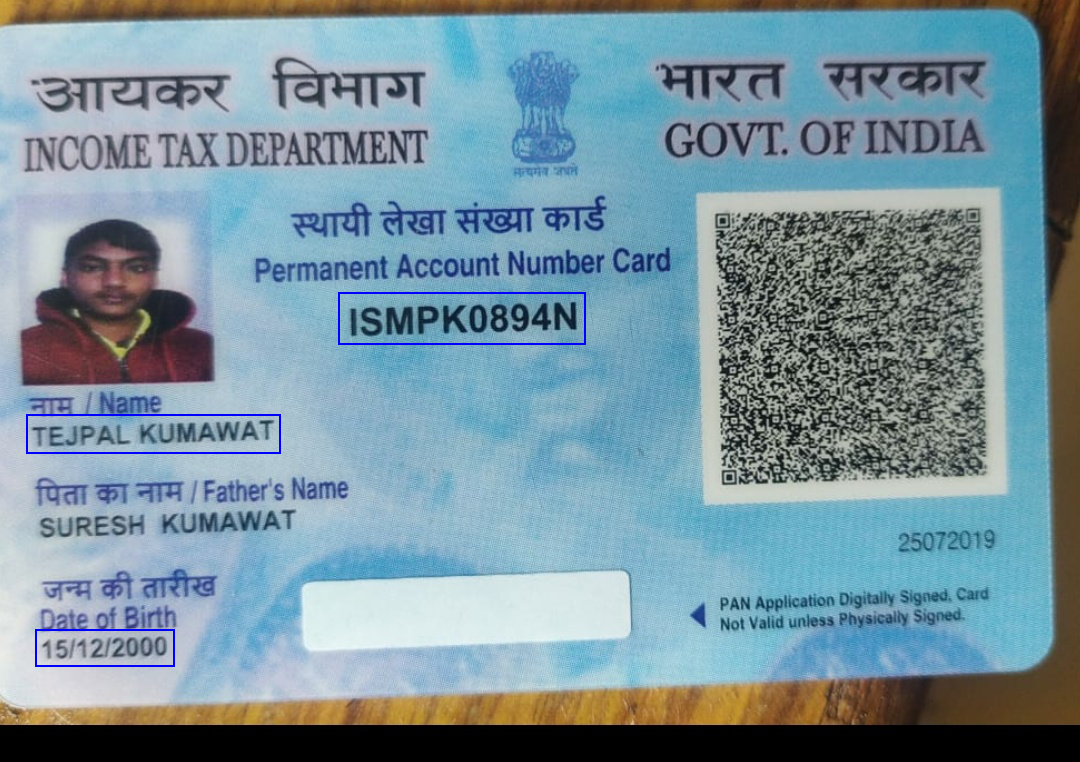

In [26]:
draw_boxes(image1,output2)

###  Pytesseract

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14072 sha256=631bb1cd3fd7ecf10a6be67dd1f6d74bf59b88128374ea0f038a1ba3d3f079a3
  Stored in directory: /root/.cache/pip/wheels/a4/89/b9/3f11250225d0f90e5454fcc30fd1b7208db226850715aa9ace
Successfully built pytesseract
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 40 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 

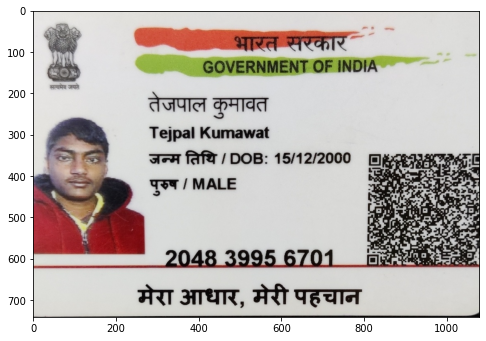

In [27]:

!pip install pytesseract
!sudo apt install tesseract-ocr
!sudo apt install tesseract-ocr-hin
import cv2 
import pytesseract
import matplotlib.pyplot as plt
from IPython.display import Image
from pylab import rcParams
import numpy as np
from pprint import pprint
from pytesseract import Output

rcParams['figure.figsize'] = 8, 16

file_name = "/content/drive/MyDrive/Fabgaurd Internship/python to excel practice/temp.jpg"

img = cv2.imread(file_name)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [28]:
text_out = pytesseract.image_to_string(img,lang='eng')

print(text_out)


a)
Tejpal Kumawat

ale Hada

 

  

   

aea fate / DOB: 15/12/2000



## Pytesseract is not working well for me , i found difficult to extract multiple language at the same time in a systematic manner

In [29]:
import pandas as pd
import numpy as np
import openpyxl


In [30]:
wb=openpyxl.load_workbook('/content/drive/MyDrive/Fabgaurd Internship/python to excel practice/sample_submission.xlsx')
ws=wb['Python to excel']
print(ws['A3'].value)

None


In [31]:
aadharcard_name=output_text[3]
aadharcard_name

'Tejpal Kumawat'

In [33]:
if aadharcard_name==pancard_name:
 ws['A2'].value=output_text[3]
 ws['B2'].value=output_text[5][4:]
 ws['C2'].value=output_text[7]
 ws['C1']='Gender'
 ws['D2'].value=output_text[8].replace('_',' ')
 ws['E1']='PanCard Number'
 ws['E2'].value=output2[8][1]
 wb.save('/content/drive/MyDrive/Fabgaurd Internship/python to excel practice/sample_submission.xlsx')